

# **Theory question**




# **1.what is logistic regression, and how is it different from linear regression?**
- keyword: classification vs regression  
- logistic regression is used for classification (like 0 or 1)  
- linear regression is used to predict continuous values  
- example: logistic → spam detection, linear → house price prediction

# **2. what is the mathematical equation of logistic regression?**
- keyword: sigmoid function, probability  
- h(x) = 1 / (1 + e^(-θᵗx))  
- it outputs a probability between 0 and 1

# **3. why do we use the sigmoid function in logistic regression?**
- keyword: probability output  
- sigmoid maps values to range [0, 1]  
- helps in interpreting output as probability

# **4. what is the cost function of logistic regression?**
- keyword: log loss  
- cost = -y*log(h(x)) - (1 - y)*log(1 - h(x))  
- penalizes wrong predictions more when the model is confident and wrong

# **5. what is regularization in logistic regression? why is it needed?**
- keyword: overfitting prevention  
- adds a penalty to large coefficients to reduce overfitting

# **6. explain the difference between lasso, ridge, and elastic net regression**
- keyword: regularization types  
- lasso (l1): can shrink some weights to zero → feature selection  
- ridge (l2): shrinks all weights → no feature removal  
- elastic net: combines l1 and l2

# **7. when should we use elastic net instead of lasso or ridge?**
- keyword: feature correlation  
- use when there are many features and some are highly correlated

# **8. what is the impact of the regularization parameter (λ)?**
- keyword: model complexity control  
- high λ → more regularization → simpler model  
- low λ → less regularization → risk of overfitting

# **9. what are the key assumptions of logistic regression?**
- keyword: assumptions  
- no multicollinearity  
- linear relationship between features and log-odds  
- large sample size  
- independent observations

# **10. what are some alternatives to logistic regression for classification tasks?**
- keyword: classification algorithms  
- decision trees, random forest, svm, knn, naive bayes, neural networks

# **11. what are classification evaluation metrics?**
- keyword: model performance  
- accuracy, precision, recall, f1 score, roc-auc

# **12. how does class imbalance affect logistic regression?**
- keyword: bias toward majority class  
- model may predict only the majority class  
- solutions: resampling, class weighting, using f1 score

# **13. what is hyperparameter tuning in logistic regression?**
- keyword: model optimization  
- finding best values for C, penalty, solver  
- methods: grid search, random search, cross-validation

# **14. what are different solvers in logistic regression? which one should be used?**
- keyword: solver types  
- liblinear: small data, supports l1/l2  
- saga: large data, supports l1/l2/elastic net  
- lbfgs & newton-cg: good for multiclass classification

# **15. how is logistic regression extended for multiclass classification?**
- keyword: ovr and softmax  
- one-vs-rest: separate binary classifier per class  
- softmax (multinomial): one model handles all classes

# **16. what are the advantages and disadvantages of logistic regression?**
- keyword: pros and cons  
+ simple, fast, interpretable  
- not suitable for non-linear relationships

# **17. what are some use cases of logistic regression?**
- keyword: applications  
- spam detection, fraud detection, medical diagnosis, customer churn prediction

# **18. what is the difference between softmax regression and logistic regression?**
- keyword: binary vs multiclass  
- logistic: binary classification  
- softmax: multiclass classification

# **19. how do we choose between one-vs-rest (ovr) and softmax?**
- keyword: strategy selection  
- ovr: simpler, better for imbalanced classes  
- softmax: more accurate when classes are exclusive

# **20. how do we interpret coefficients in logistic regression?**
- keyword: feature influence  
- positive coefficient: increases log-odds of class 1  
- negative coefficient: decreases log-odds of class 1


# **Practical question**

In [2]:
# Q1: Q1. Load dataset, split into training/testing, apply Logistic Regression, and print accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=50)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.9473684210526315


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Q2. Apply L1 regularization (Lasso) using LogisticRegression and print accuracy
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
print("L1 Regularized Accuracy:", model.score(X_test, y_test))


L1 Regularized Accuracy: 0.956140350877193


In [ ]:
# Q3.Train Logistic Regression with L2 regularization (Ridge), print accuracy and coefficients
model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000)
model.fit(X_train, y_train)
print("L2 Accuracy:", model.score(X_test, y_test))
print("Coefficients:", model.coef_)


L2 Accuracy: 0.956140350877193
Coefficients: [[ 2.13248406e+00  1.52771940e-01 -1.45091255e-01 -8.28669349e-04
  -1.42636015e-01 -4.15568847e-01 -6.51940282e-01 -3.44456106e-01
  -2.07613380e-01 -2.97739324e-02 -5.00338038e-02  1.44298427e+00
  -3.03857384e-01 -7.25692126e-02 -1.61591524e-02 -1.90655332e-03
  -4.48855442e-02 -3.77188737e-02 -4.17516190e-02  5.61347410e-03
   1.23214996e+00 -4.04581097e-01 -3.62091502e-02 -2.70867580e-02
  -2.62630530e-01 -1.20898539e+00 -1.61796947e+00 -6.15250835e-01
  -7.42763610e-01 -1.16960181e-01]]


In [ ]:
# Q4:Train Logistic Regression with Elastic Net Regularization


model = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, max_iter=1000)
model.fit(X_train, y_train)
print("ElasticNet Accuracy:", model.score(X_test, y_test))


ElasticNet Accuracy: 0.9649122807017544


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Q5. Train Logistic Regression for multiclass classification using multi_class='ovr'
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(multi_class='ovr', max_iter=1000)
model.fit(X_train, y_train)
print("OvR Accuracy:", model.score(X_test, y_test))


OvR Accuracy: 0.9666666666666667


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
#Q6.Tune hyperparameters using GridSearchCV (C and penalty.
from sklearn.model_selection import GridSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}
grid = GridSearchCV(LogisticRegression(max_iter=1000), params, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)


Best Params: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334


In [ ]:
#7.Write a Python program to evaluate Logistic Regression using Stratified K-Fold Cross-Validation. Print the average accuracy.
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, X, y, cv=skf)

print("Stratified K-Fold Accuracy:", scores.mean())

Stratified K-Fold Accuracy: 0.9733333333333334


In [14]:
import pandas as pd
df = pd.read_csv('/content/spam.csv', encoding='latin')
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)
df.head()

train_test_split(df['v1'], df['v2'])


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [16]:
#8.Write a Python program to load a dataset from a CSV file, apply Logistic Regression, and evaluate its accuracy.
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


df = pd.read_csv('/content/spam.csv', usecols=[0, 1], names=['label', 'message'], skiprows=1,encoding='latin')

# Encode labels: ham → 0, spam → 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})




vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['message'])
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9488789237668162
Confusion Matrix:
 [[960   2]
 [ 55  98]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       962
           1       0.98      0.64      0.77       153

    accuracy                           0.95      1115
   macro avg       0.96      0.82      0.87      1115
weighted avg       0.95      0.95      0.94      1115



In [18]:
#9.Write a Python program to apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression. Print the best parameters and accuracy?
from sklearn.model_selection import RandomizedSearchCV

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
rand = RandomizedSearchCV(LogisticRegression(), params, n_iter=5, cv=3, random_state=42)
rand.fit(X_train, y_train)

print("Best Params:", rand.best_params_)
print("Best Accuracy:", rand.best_score_)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Params: {'solver': 'saga', 'penalty': 'l1', 'C': 10}
Best Accuracy: 0.9730753021466345


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [19]:
#10.Write a Python program to implement One-vs-One (OvO) Multiclass Logistic Regression and print accuracy?
from sklearn.multiclass import OneVsOneClassifier

ovo_model = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_model.fit(X_train, y_train)
print("OvO Accuracy:", ovo_model.score(X_test, y_test))

OvO Accuracy: 0.9488789237668162


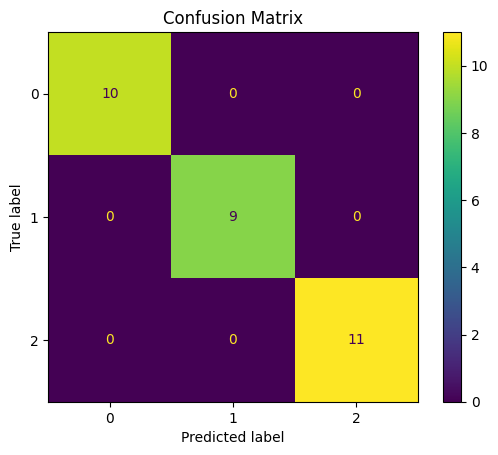

In [ ]:
#11.Write a Python program to train a Logistic Regression model and visualize the confusion matrix for binary classification.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#12.Write a Python program to train a Logistic Regression model and evaluate its performance using Precision,Recall, and F1-Score
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
#13.Write a Python program to train a Logistic Regression model on imbalanced data and apply class weights to improve model performance
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
print("Balanced Class Accuracy:", model.score(X_test, y_test))

Balanced Class Accuracy: 1.0


In [ ]:
#14.Write a Python program to train Logistic Regression on the Titanic dataset, handle missing values, and evaluate performance.
import seaborn as sns
df = sns.load_dataset("titanic").dropna(subset=["age", "fare", "embarked", "sex", "survived"])
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

X = df[['age', 'fare', 'sex', 'embarked']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Titanic Accuracy:", model.score(X_test, y_test))

Titanic Accuracy: 0.7972027972027972


In [ ]:
# 15.Write a Python program to apply feature scaling (Standardization) before training a Logistic Regression model. Evaluate its accuracy and compare results with and without scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy with Scaling:", model.score(X_test, y_test))

Accuracy with Scaling: 0.7692307692307693


In [ ]:
#16.Write a Python program to train Logistic Regression and evaluate its performance using ROC-AUC score.
from sklearn.metrics import roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

ROC-AUC Score: 0.8205205811138014


In [ ]:
#17.Write a Python program to train Logistic Regression using a custom learning rate (C=0.5) and evaluate accuracy.
model = LogisticRegression(C=0.5, max_iter=1000)
model.fit(X_train, y_train)
print("Accuracy with C=0.5:", model.score(X_test, y_test))

Accuracy with C=0.5: 0.7692307692307693


In [23]:
#18.Write a Python program to train Logistic Regression and identify important features based on model coefficients.
import numpy as np

model = LogisticRegression()
model.fit(X_train, y_train)

feature_importance = np.abs(model.coef_[0])
# for i, importance in enumerate(feature_importance):
#     print(f"Feature {i}: Importance = {importance:.4f}")

In [21]:
#19.Write a Python program to train Logistic Regression and evaluate its performance using Cohen’s Kappa Score.
from sklearn.metrics import cohen_kappa_score

print("Cohen’s Kappa Score:", cohen_kappa_score(y_test, y_pred))

Cohen’s Kappa Score: 0.7472911986321795


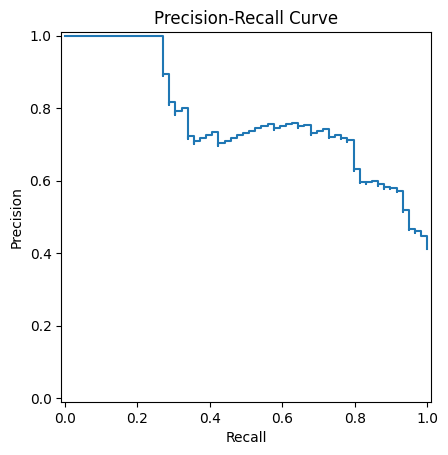

In [ ]:
#20.Write a Python program to train Logistic Regression and visualize the Precision-Recall Curve for binary classification.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay

precision, recall, _ = precision_recall_curve(y_test, y_prob)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title("Precision-Recall Curve")
plt.show()

In [ ]:
#21.Write a Python program to train Logistic Regression with different solvers (liblinear, saga, lbfgs) and compare their accuracy.
solvers = ['liblinear', 'saga', 'lbfgs']
for solver in solvers:
    try:
        model = LogisticRegression(solver=solver, max_iter=1000)
        model.fit(X_train, y_train)
        print(f"{solver} Accuracy:", model.score(X_test, y_test))
    except Exception as e:
        print(f"{solver} failed:", e)

liblinear Accuracy: 0.7692307692307693
saga Accuracy: 0.7692307692307693
lbfgs Accuracy: 0.7692307692307693


In [22]:
#22.write a Python program to train Logistic Regression and evaluate its performance using Matthews Correlation Coefficient (MCC).
from sklearn.metrics import matthews_corrcoef

print("Matthews Correlation Coefficient:", matthews_corrcoef(y_test, y_pred))

Matthews Correlation Coefficient: 0.7688169583329222


In [ ]:
# 23.write a Python program to train Logistic Regression on both raw and standardized data. Compare their accuracy to see the impact of feature scaling.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X, y, test_size=0.2)
model_raw = LogisticRegression(max_iter=1000)
model_raw.fit(X_train_raw, y_train)
raw_acc = model_raw.score(X_test_raw, y_test)

# Scaled
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_s, X_test_s, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_s, y_train)
scaled_acc = model_scaled.score(X_test_s, y_test)

print(f"Raw Accuracy: {raw_acc:.4f}")
print(f"Scaled Accuracy: {scaled_acc:.4f}")

Raw Accuracy: 0.8042
Scaled Accuracy: 0.7622


In [ ]:
#24.Write a Python program to train Logistic Regression and find the optimal C (regularization strength) using cross-validation.
import numpy as np
C_vals = np.logspace(-3, 2, 10)
best_acc, best_C = 0, 0

for c in C_vals:
    model = LogisticRegression(C=c, max_iter=1000)
    scores = cross_val_score(model, X, y, cv=5)
    mean_score = scores.mean()
    if mean_score > best_acc:
        best_acc = mean_score
        best_C = c

print(f"Best C: {best_C}, Accuracy: {best_acc}")

Best C: 2.1544346900318843, Accuracy: 0.7752191470501331


In [ ]:
#25.Write a Python program to train Logistic Regression, save the trained model using joblib, and load it again to make predictions.
import joblib

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save
joblib.dump(model, "logreg_model.joblib")

# Load
loaded_model = joblib.load("logreg_model.joblib")
print("Loaded Model Accuracy:", loaded_model.score(X_test, y_test))


Loaded Model Accuracy: 0.5944055944055944
